# Detect exact dot on distorted image

importing modules

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
from PIL import Image

In [5]:
flags  = []
for i in dir(cv2):
    if i.startswith('COLOR_'):
        flags.append(i)

In [6]:
len(flags)

346

In [7]:
flags[42]

'COLOR_BAYER_GR2RGBA'

In [30]:
img = Image.open("test2.png" , mode = "r", formats=None)
img = np.array(img)

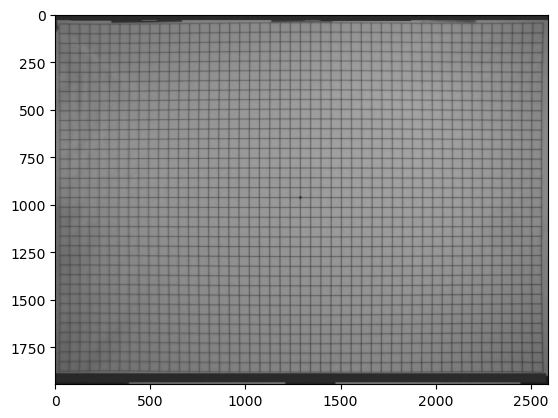

In [31]:
plt.imshow(img)
plt.show()

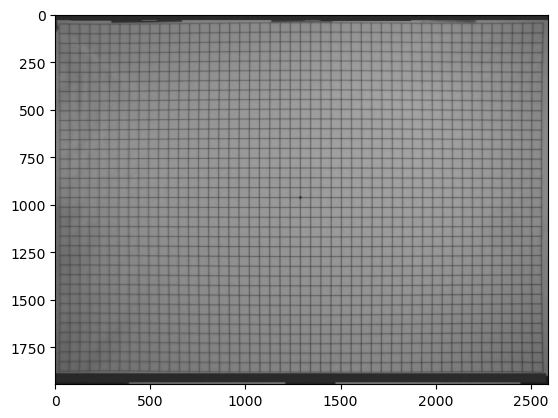

In [34]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(converted_img)
plt.show()

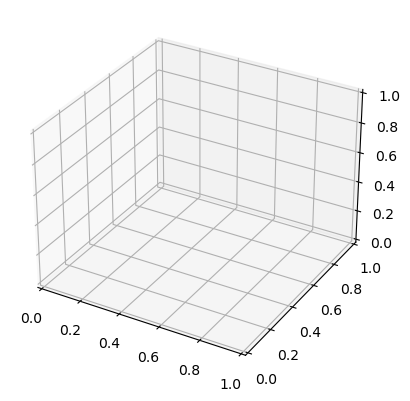

In [42]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

r, g, b = cv2.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()



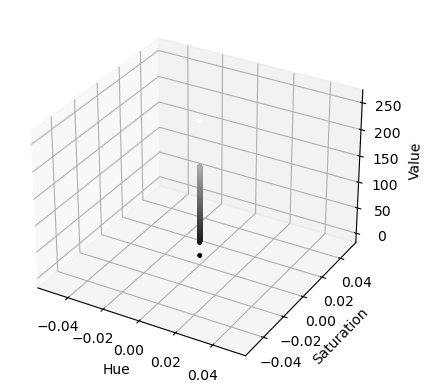

In [40]:
hsv_img = cv2.cvtColor(img , cv2.COLOR_RGB2HSV)

# hsv imagesini 3 parçaya bölelim.

h , s , v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten() , facecolors = pixel_colors , marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

 Değerler az çok gözüküyor ama deneysel olarak denemeden önce farklı maskeleme yöntemlerine de bir bakalım.

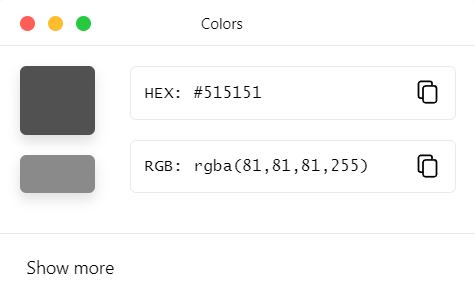 

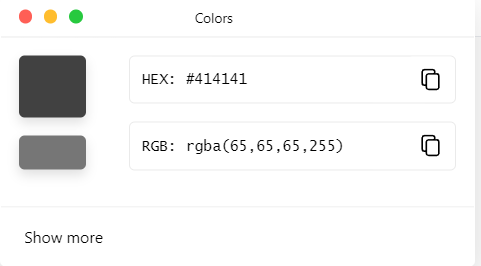

* rgba(132,132,132,255)
* rgba(72,72,72,255)
* rgba(120,120,120,255) __orta__    
* rgba(67,67,67,255)
* rgba(42,42,42,255) __koyu__

In [54]:
light_black = (72, 72, 72)
dark_black = (42, 42, 42)

### Dislpaying blocks with colors

In [55]:
from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10, 10, 3), light_black, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_black, dtype=np.uint8) / 255.0

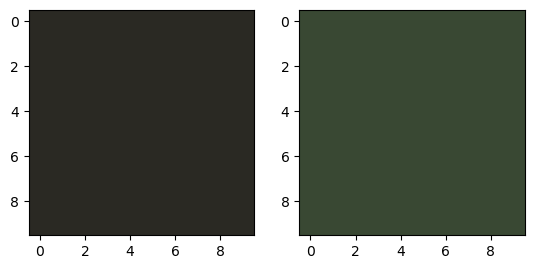

In [56]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

## Masking image

In [72]:
mask = cv2.inRange(hsv_img, light_black, dark_black)
result = cv2.bitwise_xor(img, img, mask=mask)


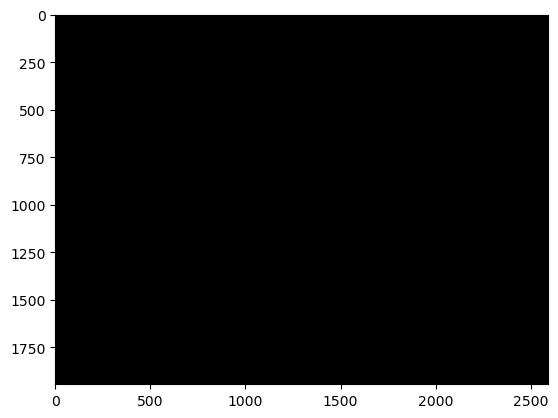

In [73]:
plt.imshow(result)